# nCov2019数据分析

## 数据来源

本数据来源于[2019新型冠状病毒疫情时间序列数据仓库](https://github.com/BlankerL/DXY-2019-nCoV-Data)，其数据来源为[丁香园](https://3g.dxy.cn/newh5/view/pneumonia)。

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_util
import plot_util

from IPython.display import display, Markdown

In [35]:
city_name = '深圳'

In [36]:
display(Markdown('## ' + city_name + '数据'))

## 深圳数据

In [37]:
raw_data = data_util.load_data()

In [38]:
display(Markdown('### ' + city_name + '累计数量'))

### 深圳累计数量

In [39]:

city_daily_data = data_util.aggregate_daily(raw_data, city_name)
city_daily_data = data_util.calculate_dead_cured_rate(city_daily_data)
city_daily_data.tail(5)

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
9232,广东省,深圳,245,0,10,0,2020-02-03 20:50:01.604,2020-02-03,0.0,4.081633
7535,广东省,深圳,271,0,13,0,2020-02-04 20:55:16.467,2020-02-04,0.0,4.797048
5304,广东省,深圳,291,0,16,0,2020-02-05 21:18:47.516,2020-02-05,0.0,5.498282
3034,广东省,深圳,316,0,22,0,2020-02-06 20:40:40.766,2020-02-06,0.0,6.962025
722,广东省,深圳,339,0,31,0,2020-02-07 18:14:50.649,2020-02-07,0.0,9.144543


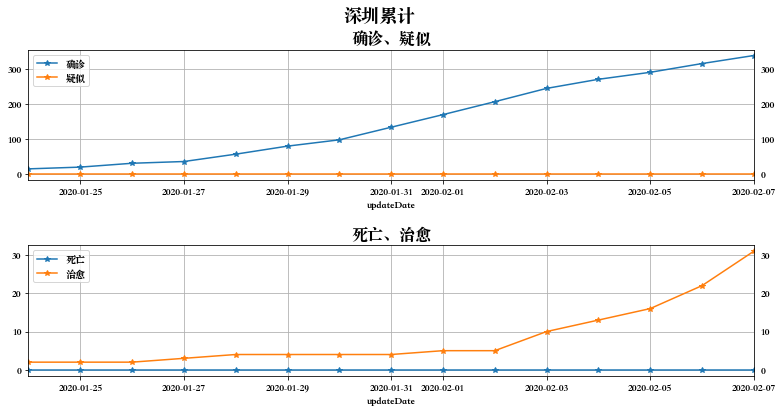

In [40]:
figure = plot_util.plot_conf_main(city_daily_data, city_name + '累计')

In [41]:
display(Markdown('### ' + city_name + '增长速度'))

### 深圳增长速度

In [42]:
city_daily_data_1st_derivative = data_util.diff(city_daily_data)
city_daily_data_1st_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
9232,广东省,深圳,38.0,0.0,5.0,0.0,2020-02-03 20:50:01.604,2020-02-03,0.0,1.666174
7535,广东省,深圳,26.0,0.0,3.0,0.0,2020-02-04 20:55:16.467,2020-02-04,0.0,0.715415
5304,广东省,深圳,20.0,0.0,3.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,0.701234
3034,广东省,深圳,25.0,0.0,6.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,1.463744
722,广东省,深圳,23.0,0.0,9.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,2.182517


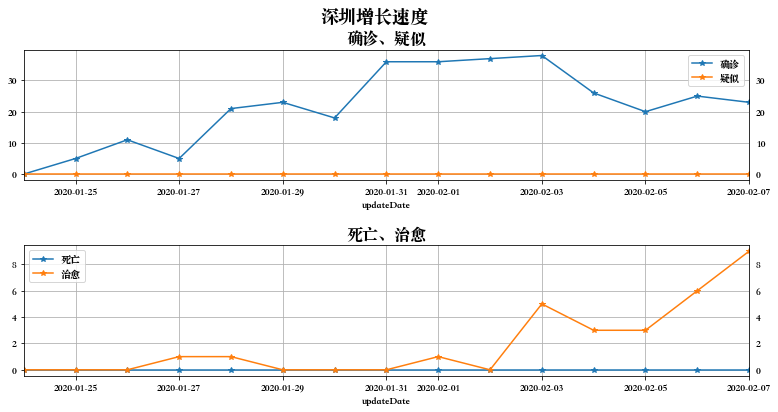

In [43]:
figure = plot_util.plot_conf_main(city_daily_data_1st_derivative, city_name + '增长速度')

In [44]:
display(Markdown('### ' + city_name + '增长加速度'))

### 深圳增长加速度

In [45]:
city_daily_data_2nd_derivative = data_util.diff(city_daily_data_1st_derivative)
city_daily_data_2nd_derivative.tail()

,provinceName,cityName,confirmed,suspected,cured,dead,updateTime,updateDate,dead_rate,cured_rate
9232,广东省,深圳,1.0,0.0,5.0,0.0,2020-02-03 20:50:01.604,2020-02-03,0.0,2.191891
7535,广东省,深圳,-12.0,0.0,-2.0,0.0,2020-02-04 20:55:16.467,2020-02-04,0.0,-0.950758
5304,广东省,深圳,-6.0,0.0,0.0,0.0,2020-02-05 21:18:47.516,2020-02-05,0.0,-0.014182
3034,广东省,深圳,5.0,0.0,3.0,0.0,2020-02-06 20:40:40.766,2020-02-06,0.0,0.762510
722,广东省,深圳,-2.0,0.0,3.0,0.0,2020-02-07 18:14:50.649,2020-02-07,0.0,0.718774


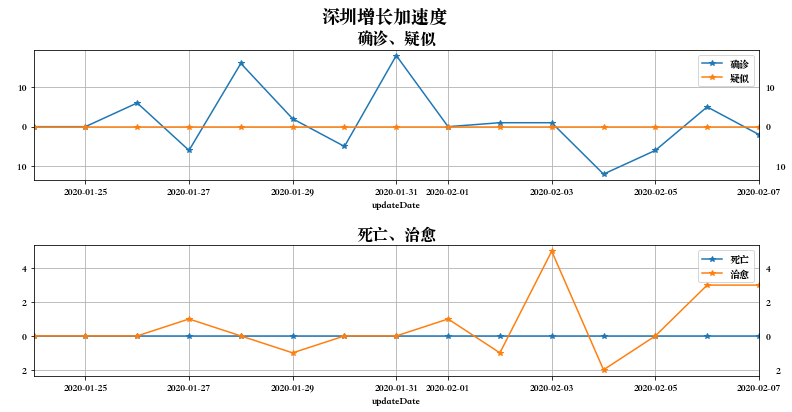

In [46]:
figure = plot_util.plot_conf_main(city_daily_data_2nd_derivative, city_name + '增长加速度')

In [47]:
display(Markdown('### ' + city_name + '死亡治愈率'))

### 深圳死亡治愈率

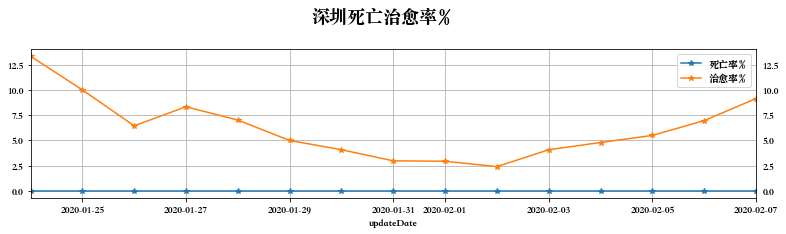

In [49]:
figure = plot_util.plot_conf_dead_cured_ratio(city_daily_data, city_name + '死亡治愈率%')

In [50]:
black_province_name = '湖北省'

In [51]:
display(Markdown('## 全国数据（除' + black_province_name + '）'))

## 全国数据（除湖北省）

In [52]:
display(Markdown('因' + black_province_name + '灾情特别严重且现已隔离（' + black_province_name + '加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。'))

因湖北省灾情特别严重且现已隔离（湖北省加油），它的数据可能和全国其他地区有较大差别。为更精确预计其他地区的未来发展趋势，这里考虑排除其以外的全国其他地区情况。

In [53]:
display(Markdown('## 全国累计（除' + black_province_name + '）'))

## 全国累计（除湖北省）

In [54]:
white_daily_data = data_util.aggregate_daily_except(raw_data, province_name=black_province_name)
white_daily_data = data_util.calculate_dead_cured_rate(white_daily_data)

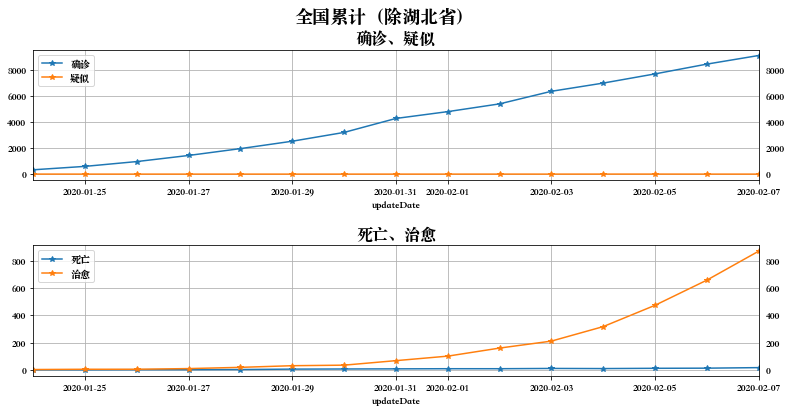

In [55]:
figure = plot_util.plot_conf_main(white_daily_data, '全国累计（除' + black_province_name + '）')

In [56]:
display(Markdown('## 全国增长速度（除' + black_province_name + '）'))

## 全国增长速度（除湖北省）

In [57]:
white_daily_data_1st_derivative = data_util.diff(white_daily_data)
white_daily_data_1st_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-03,964.0,-1.0,51.0,2.0,0.003291,0.349234
2020-02-04,629.0,2.0,106.0,-1.0,-0.031389,1.218453
2020-02-05,704.0,0.0,156.0,2.0,0.011587,1.613539
2020-02-06,750.0,-2.0,184.0,1.0,-0.003200,1.633704
2020-02-07,660.0,0.0,212.0,4.0,0.031948,1.765627


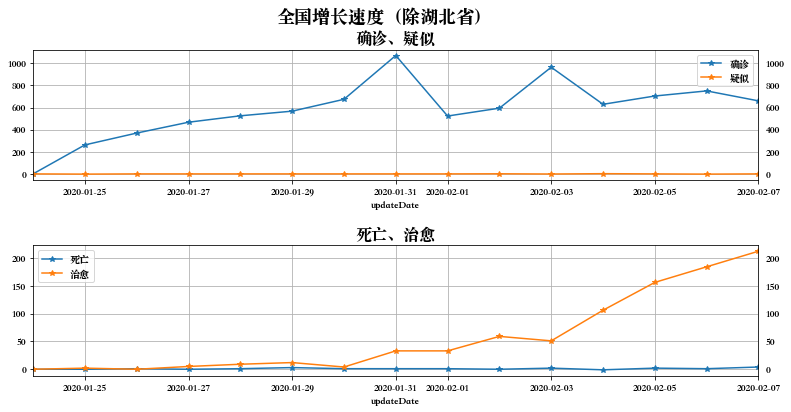

In [58]:
figure = plot_util.plot_conf_main(white_daily_data_1st_derivative, '全国增长速度（除' + black_province_name + '）')

In [59]:
display(Markdown('## 全国增长加速度（除' + black_province_name + '）'))

## 全国增长加速度（除湖北省）

In [60]:
white_daily_data_2nd_derivative = data_util.diff(white_daily_data_1st_derivative)
white_daily_data_2nd_derivative.tail()

,confirmed,suspected,cured,dead,dead_rate,cured_rate
updateDate,,,,,,
2020-02-03,370.0,-2.0,-8.0,2.0,0.026342,-0.511893
2020-02-04,-335.0,3.0,55.0,-3.0,-0.034680,0.869219
2020-02-05,75.0,-2.0,50.0,3.0,0.042976,0.395086
2020-02-06,46.0,-2.0,28.0,-1.0,-0.014786,0.020165
2020-02-07,-90.0,2.0,28.0,3.0,0.035148,0.131923


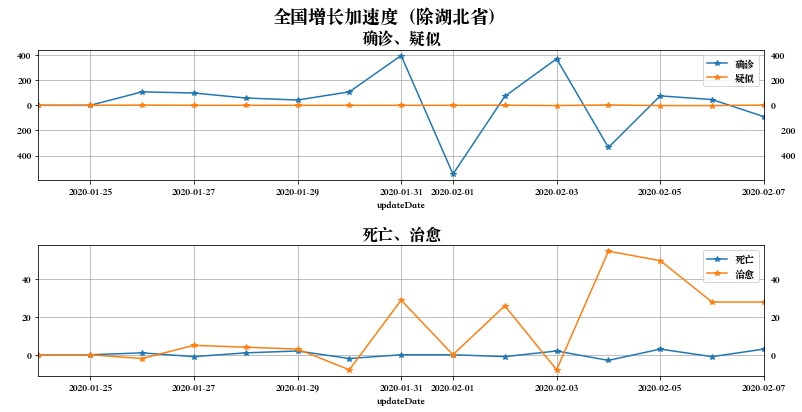

In [61]:
figure = plot_util.plot_conf_main(white_daily_data_2nd_derivative, '全国增长加速度（除' + black_province_name + '）')

In [62]:
display(Markdown('## 全国增死亡治愈率（除' + black_province_name + '）'))

## 全国增死亡治愈率（除湖北省）

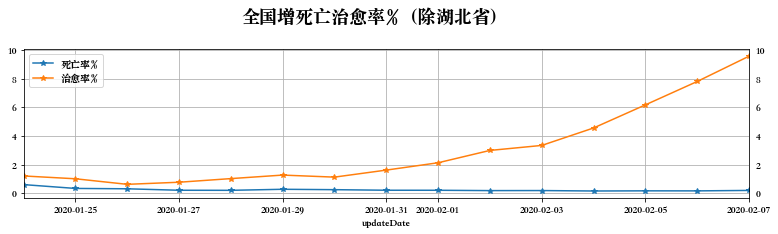

In [63]:
figure = plot_util.plot_conf_dead_cured_ratio(white_daily_data, '全国增死亡治愈率%（除' + black_province_name + '）')